In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from scipy import signal
import scipy.io as sio
from PIL import Image
from scipy import stats

## Rhythmicity in walking (gait)

(222, 2)
(222, 2)
276.2733
(276273,) 276273
[0. 0. 0. ... 0. 0. 1.]
(250730,)


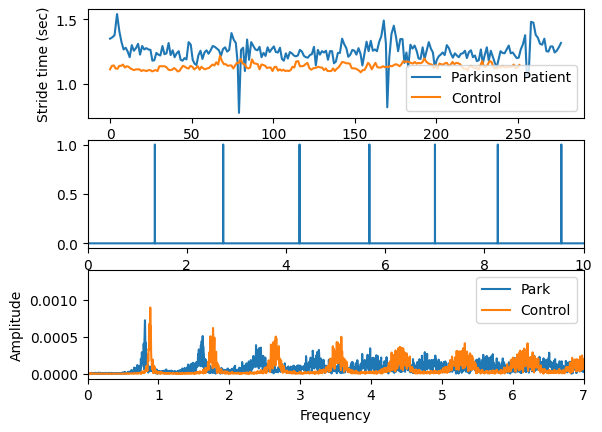

In [ ]:
# Data
matdata = sio.loadmat('gait.mat')
#print(matdata)

# extract data from mat file
park = matdata['park']
cont = matdata['cont']
print(park.shape)
print(cont.shape)
#print(cont[-1])
#print(park)

# plot the gait speed for Parkinson's patient and control
plt.subplot2grid((3,1),(0,0))
plt.plot(park[:,0],park[:,1],label='Parkinson Patient')#276.273 seconds samma janxa
plt.plot(cont[:,0],cont[:,1],label='Control')#250.73 seconds samma janxa
plt.xlabel('Time (sec)')
plt.ylabel('Stride time (sec)')
plt.legend()

# define sampling rate
srate = 1000
print(park[-1,0])

########## Create time series of steps############

parkts = np.zeros(int(park[-1,0]*1000)) # convert to milisecond and create that much zeros
print(parkts.shape, len(parkts)) ## 276273 miliseconds

for i in range(0,len(park)):# 0 to 221
  parkts[int(park[i,0]*1000-1)] = 1 #Find time points where steps was recorded and change value to 1
  #print(int(park[i,0]*1000-1))

print(parkts)

# create time vector and number of time points
parktx = np.arange(0,len(parkts))/srate
parkn = len(parktx)





############ Repeat for Control data##############
contts = np.zeros(int(cont[-1,0]*1000))
print(contts.shape)

for i in range(0,len(cont)): #0 to 221
  contts[int(cont[i,0]*1000-1)] = 1

#time vector and number of time points
conttx = np.arange(0,len(contts))/srate
contn = len(conttx)



#plot time course of steps
plt.subplot2grid((3,1),(1,0))
plt.plot(parktx,parkts) # steps at certain milisecond is seen
plt.xlim([0,10])

# Compute power for both datasets
parkPow = 2*np.abs(scipy.fftpack.fft(parkts)/parkn)
contPow = 2*np.abs(scipy.fftpack.fft(contts)/contn)

# Compute separate frequencies vector for each subject
parkHz = np.linspace(0,srate/2,int(np.floor(parkn/2)+1))
contHz = np.linspace(0,srate/2,int(np.floor(contn/2)+1))

#show power spectra
plt.subplot2grid((3,1),(2,0))
plt.plot(parkHz[1:],parkPow[1:len(parkHz)],label='Park')
plt.plot(contHz[1:],contPow[1:len(contHz)],label='Control')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim([0,7])

plt.show()



```
Most people tend to walk lil bit less than 1 step per sec.

Signals are highly rythmetic but non sinusoidal.
Therefore, we require non zero energy at higher harmonics. (to represent sharp edges)
Higher peaks are called harmonics


Conclusion in given signal:
Fundamental and higher harmonics are wider in parkinson patient compared to control patient.
 There is greater signal non-stationarity for the patient than the control.

last diagram: We see Spectral Manifestation of inc. in variability in the signal.


use: - access disease severity
     - track symptom improvement
```



## Rhythmicity in electrical brain waves

(122880,) [1024]


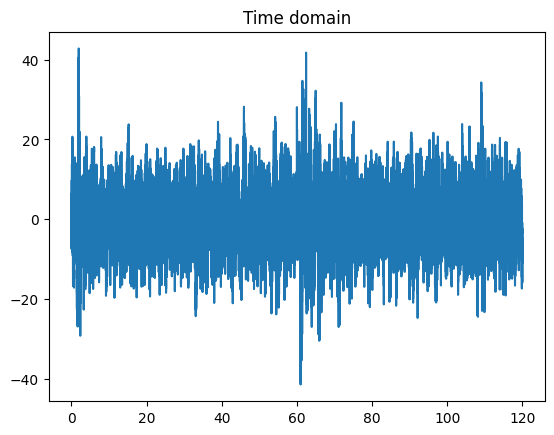

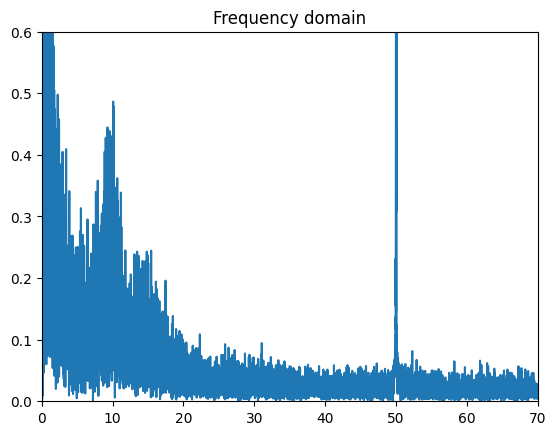

In [ ]:
matdata = sio.loadmat('EEGrestingState.mat')

#extract data from mat file
eegdata = matdata['eegdata'][0]
srate = matdata['srate'][0]
print(eegdata.shape, srate)

n = len(eegdata)
timevec = np.arange(n)/srate

plt.plot(timevec,eegdata)
plt.title('Time domain')
plt.show()

# Compute Amplitude spectrum
amp_dataX = 2*abs(scipy.fftpack.fft(eegdata)/n)
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(hz,amp_dataX[0:len(hz)])
plt.xlim([0,70])
plt.ylim([0,.6])
plt.title('Frequency domain')
plt.show()



```
signal: 1 channel and 122880 time points(120 sec = 2min)
srate = 1024 ie, around 1 sample per sec

10 hz is most common(alpha )- nonstationarity feature

dec in amplitude with inc in freq

50hz - electrical line noise(ignore)
```



## Time Series Convolution

60
51


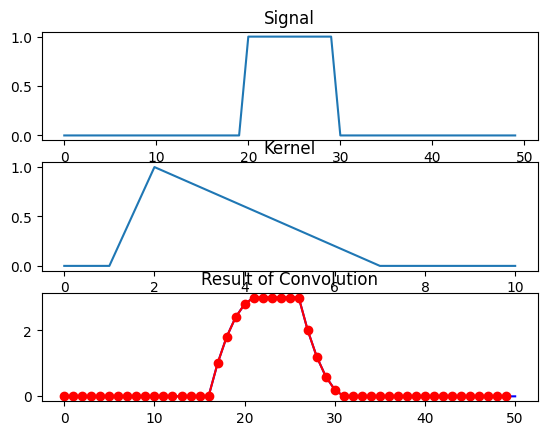

In [ ]:
m = 50 # length of the signal
n = 11 # length of the  kernel

#signal
signal = np.zeros(m)
signal[range(int(m*.4),int(m*.6))] = 1 #range(20,30) ma 1 rakheko

#kernel
kernel = np.zeros(n)
kernel[range(int(n*.25),int(n*.8))] = np.linspace(1,0,int(n*.55)) #array([1. , 0.8, 0.6, 0.4, 0.2, 0. ])

#plot signal and kernel
plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')

plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')



############ Convolution #########################

#Method 1
nconv =m+n-1
halfk = np.floor(n/2)

# convolution as pointwise multiplication of spectra and inverse

#FFT
mx = scipy.fftpack.fft(signal,nconv)
nx = scipy.fftpack.fft(kernel,nconv)

# Convolution
convres = np.real(scipy.fftpack.ifft( np.multiply(mx,nx))) #len = 60
print(len(convres))

# chop off the wings of convolution
convres = convres[range(int(halfk),int(len(convres)-halfk+1))]#range(5,47)
print(len(convres))

#plot result
plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Result of Convolution')

#method 2
plt.plot(np.convolve(signal,kernel,mode='same'),'ro-')
plt.show()

## Narrowband temporal filtering

(1527,) [762.93945312] (1527,)


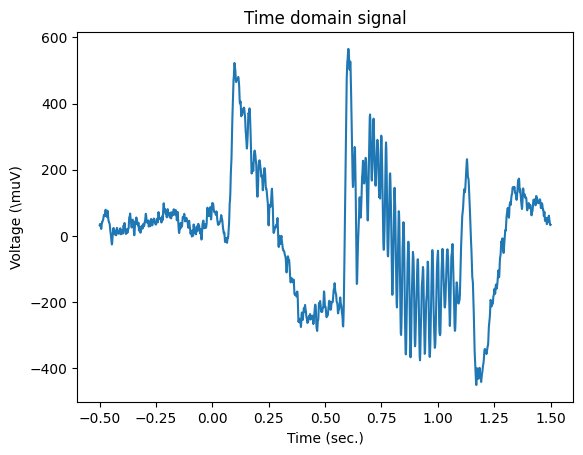

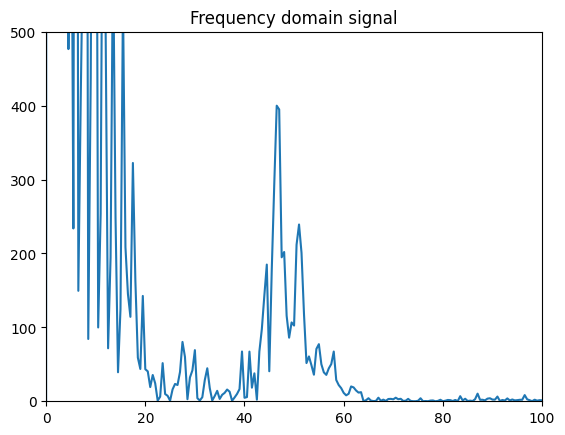

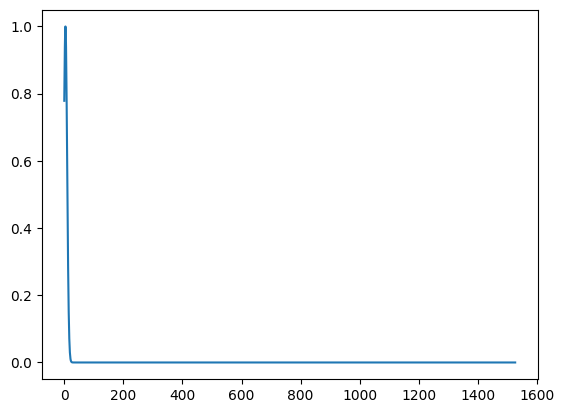

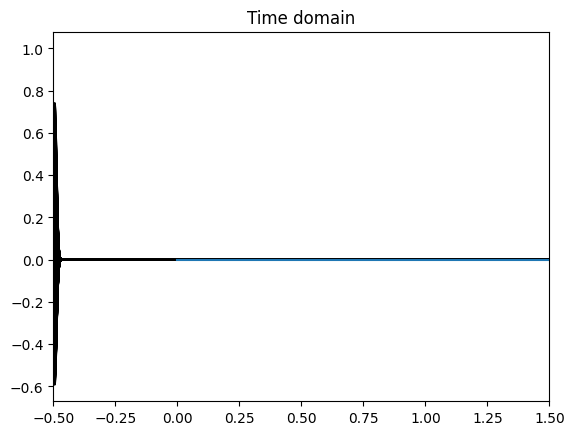

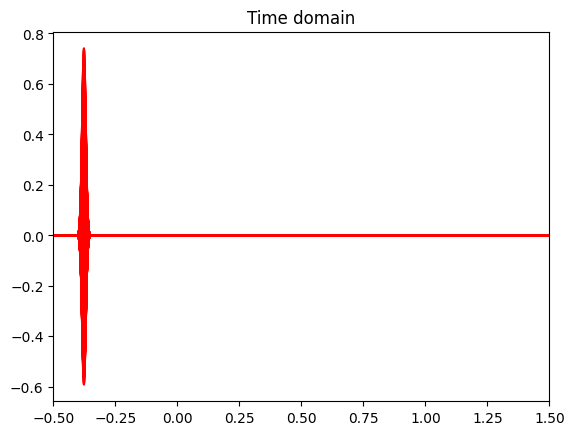

In [ ]:
matdata = sio.loadmat('braindata.mat')

#extract data
timevec = matdata['timevec'][0]
srate = matdata['srate'][0]
braindata = matdata['braindata'][0]

print(timevec.shape, srate, braindata.shape)

n = len(timevec)

# plot time domain signal
plt.plot(timevec,braindata)
plt.xlabel('Time (sec.)')
plt.ylabel('Voltage (\muV)')
plt.title('Time domain signal')
plt.show()


# Compute power spectrum
braindataX = scipy.fftpack.fft(braindata)/n
amp = (2*abs(braindataX))**2
hz = np.linspace(0,srate,n)

plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain signal')
plt.xlim([0,100])
plt.ylim([0,500])
plt.show()

################### Narrowband Temporal Filtering #####################
peakFiltFreqs = [2,47]

c = 'kr'

#loop for frequencies
for fi in range(0,len(peakFiltFreqs)):

    #construct the filter
    x = hz - peakFiltFreqs[fi] # shifted frequencies
    fx = np.exp(-(x/4)**2) #gaussian

    plt.plot(fx)
    plt.show()

    #apply filter to data
    filtdat = 2*np.real(scipy.fftpack.ifft(np.multiply(braindataX,fx)))

    #show results
    plt.plot(timevec,filtdat,c[fi],label='%d Hz' %peakFiltFreqs[fi])
    plt.title('Time domain')
    plt.xlim([-.5,1.5])

#plt.legend()
plt.show()




```
Filter brain activity at 2 hz and 47 hz
```



## Image smoothing and sharpening

(512, 512)


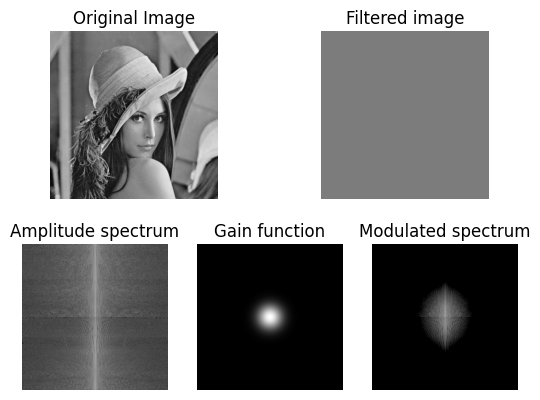

In [5]:
#load image and convert to float
lenna = np.asarray(Image.open('Lenna.png'))
imgL = np.mean(lenna,axis=2)

# plot original image
plt.subplot2grid((2,2),(0,0))
plt.imshow(imgL,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original Image')

############ Power Spectrum ####################
imgX = scipy.fftpack.fftshift(scipy.fftpack.fft(imgL))# shift helps to shift low freq to center
powr2 = np.log(np.abs(imgX)) #log helps to see data (w/0 log, distance betn data is so large , we cant see)

plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2, cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')

############## Filter kernel ####################
width = .2 #width of gaussian (normalized Z units)
lims = np.shape(imgL) #img size = 512 x 512
print(lims)
xr = stats.zscore(np.arange(lims[0])) #computes z score
#Z-score is a statistical measurement that describes
# a value's relationship to the mean of a group of values.

#print(xr) # 512 ota ko z score
[x,y] = np.meshgrid(xr,xr)

#add 1- at beginning of the next line to invert the filter
gaus2d = np.exp( -(x**2 + y**2) / (2*width**2))


# show Gaussian
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')

################# Modulated spectrum ####################
plt.subplot2grid((2,3),(1,2))
plt.imshow(np.log(np.abs( np.multiply( imgX, gaus2d))), cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')

################# Reconstructed Image #######################
imgrecon = np.real(scipy.fftpack.ifft2((imgL * gaus2d)))

plt.subplot2grid((2,2),(0,1))
plt.imshow(imgrecon, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Filtered image')
plt.show()

## Image narrowband filtering

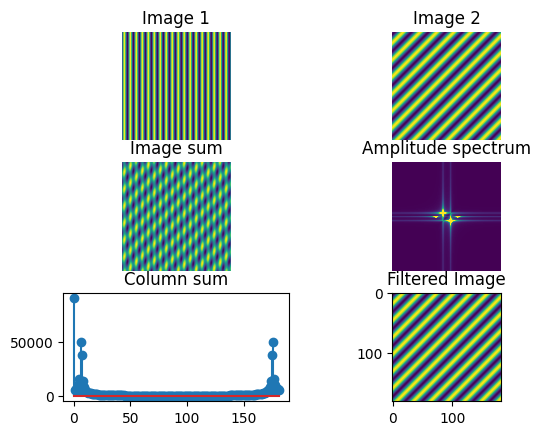

In [ ]:
# specify vector of sine phases
sinephas = [ 0 , np.pi/4 ]

# vector of sine frequencies
sinefreq = [.1 , .05] # arbitrary units


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))

# compute 2d sine gradients
xp = x*np.cos(sinephas[0]) + y*np.sin(sinephas[0])
img1 = np.sin(2*np.pi*sinefreq[0]*xp)

xp = x*np.cos(sinephas[1]) + y*np.sin(sinephas[1])
img2 = np.sin(2*np.pi*sinefreq[1]*xp)

img = img1 + img2

plt.subplot2grid((3,2),(0,0))
plt.imshow(img1)
plt.axis('off')
plt.title('Image 1')

plt.subplot2grid((3,2),(0,1))
plt.imshow(img2)
plt.axis('off')
plt.title('Image 2')

plt.subplot2grid((3,2),(1,0))
plt.imshow(img)
plt.axis('off')
plt.title('Image sum')

#FFT
imgX = scipy.fftpack.fft2(img)
imgXamp = np.abs(imgX)

plt.subplot2grid((3,2),(1,1))
plt.imshow(scipy.fftpack.fftshift(imgXamp))
plt.clim([0,500])
plt.axis('off')
plt.title('Amplitude spectrum')

# show sum down column
plt.subplot2grid((3,2),(2,0))
plt.stem(np.sum(imgXamp,axis=1))
plt.title('Column sum')

# replace 1st row with last
imgX[0,:] = imgX[-1,:]

# reconstructed image
imgrecon = np.real(scipy.fftpack.ifft2(imgX))

plt.subplot2grid((3,2),(2,1))
plt.imshow(imgrecon)
plt.title('Filtered Image')

plt.show()
